<a href="https://colab.research.google.com/github/marcos626/Redes_neuronales/blob/main/redes-neuronales-2024-guia-5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# El modelo *Integrate and Fire*

## Teoría

El modelo *Integrate and Fire* del comportamiento de una neurona viene descripto por dos ingredientes. En primer lugar, la ODE

\begin{eqnarray}
\frac{dV}{dt}
&=&
\frac{1}{\tau}
\left(
E-V(t)
+
RI(t)
\right)
\end{eqnarray}

donde:

* $V(t)$ representa el potencial de membrana al tiempo $t$,

* $E\approx -65mV$ representa el potencial de reposo,

* $\tau\approx 10ms$ representa el tiempo de relajación,

* $R\approx 10M\Omega$ representa una resistencia eléctrica, y

* $I(t)\approx 1nA$ representa una corriente/señal de entrada.

En segundo lugar, un mecanismo de disparo definido por

\begin{eqnarray}
V(t) \to E
\end{eqnarray}

cuando

\begin{eqnarray}
V(t) > V_u
\end{eqnarray}

donde:

* $V_u \approx -50mV$ representa un potencial umbral.

Es decir, según el mecanismo de disparo, el potencial de membrana $V(t)$ se resetea a su valor de reposo $E$ si supera cierto valor umbral $V_u$.

### Referencias

* https://technologystudent.com/elec1/ohm1.htm

* https://en.wikipedia.org/wiki/Biological_neuron_model#Leaky_integrate-and-fire

* https://compneuro.neuromatch.io/tutorials/W2D3_BiologicalNeuronModels/student/W2D3_Tutorial1.html



## **Ejercicio 1)** Importando librerías

**1)** Importe las librerías `numpy` para operar con arrays, `scipy` para utilizar rutinas de algebra lineal y `matplotlib.pyplot` para graficar.

**2)** Suba el archivo "libreria" `ode.py` que fabricó en el práctico 4), e impórtelo.

In [404]:
# 1.1)
import numpy as np
import scipy as sp
import scipy.linalg as linalg
import matplotlib.pyplot as plt
import plotly.graph_objs as go

In [405]:
# 1.2)
from ODE import integrador_ode, euler, rk4

## **Ejercicio 2)** Dinámica con mecanismo de disparo desactivado

**1)** Resuelva analíticamente la ODE del modelo *Integrate and Fire* para una condición inicial arbitraria $V(0)=V_0$ y una corriente de entrada $I=0$.

In [406]:
# Solución de la ODE
def V(t):
  return E + (V0 - E) * np.exp(-t / tau)  # comportamiento de una neurona

**2.2)** Grafique la solución para $V_0=10mV$ y $t\in [0,100]ms$. Incorpore al gráfico una línea punteada indicando el potencial de reposo.

In [407]:
# 2.2)
E = -65  # mV
tau = 10  # ms
V0 = 10  # mV
umbral = -50  # mV
valores_t = np.linspace(0, 100, 100)  # ms
valores_V = np.vectorize(V)(valores_t)

In [408]:
# plt.xlabel('Tiempo [ms]')
# plt.ylabel('Potencial de membrana [mV]')
# plt.plot(valores_t, valores_V, label = "", linestyle = '-', c = 'red')
# plt.plot(valores_t,np.zeros(len(valores_t)),label = "", linestyle = '-', c = 'gray')
# plt.plot(valores_t,E*np.ones(len(valores_t)),label = "$E = V^*$", linestyle = '--', c = 'black')
# plt.title('Integrate and Fire: sin disparo ni corriente')
# plt.legend()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=valores_t, y=valores_V, mode='lines', name='Potencial de membrana', line=dict(color='red')))
fig.add_trace(go.Scatter(x=valores_t, y=np.zeros(len(valores_t)), mode='lines', name='Línea base', line=dict(color='gray')))
fig.add_trace(go.Scatter(x=valores_t, y=E*np.ones(len(valores_t)), mode='lines', name='$E = V^*$', line=dict(dash='dash', color='black')))
fig.update_layout(
    title='Integrate and Fire: sin disparo ni corriente',
    xaxis_title='Tiempo [ms]',
    yaxis_title='Potencial de membrana [mV]',
    legend_title='Leyenda'
)
fig.show()

**2.3)** Realice un análisis geométrico de la solución calculada. Incorpore flechas del campo vectorial así como los puntos fijos estables, inestables y marginales, si los hubiere.

In [410]:
Vfix = E  # punto fijo es el punto donde la derivada cruza por cero.
def f(V):
    return (E-V)/tau  # ecuación de una recta, con i(t) = 0
valores_V = np.linspace(-120,20,100)
valores_f = np.vectorize(f)(valores_V)

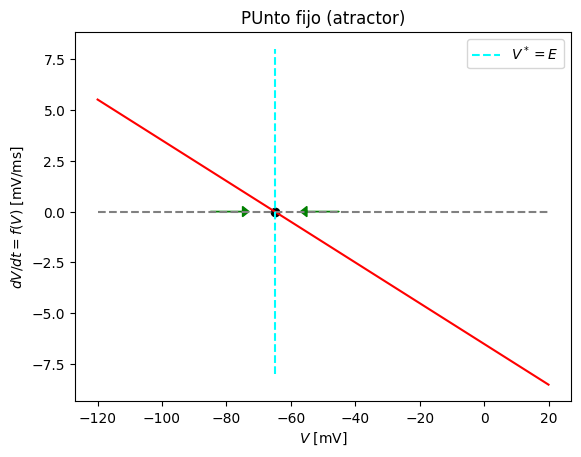

In [411]:
# plt.xlabel('$V$ [mV]')
# plt.ylabel('$dV/dt=f(V)$ [mV/ms]')
# plt.plot(valores_V,valores_f, label = "", linestyle = '-', c = 'red')
# plt.plot(valores_V,np.zeros(len(valores_V)),label = "", linestyle = '--', c = 'gray')
# plt.plot([Vfix,Vfix],[-8,8],label="$V^*=E$", linestyle = '--', c = 'cyan')
# plt.arrow(Vfix-20.0,0.0,10.0,0.0,head_width=0.5,head_length=2,fc='g',ec='g')
# plt.arrow(Vfix+20.0,0.0,-10.0,0.0,head_width=0.5,head_length=2,fc='g',ec='g')
# plt.scatter([Vfix],[0],c='black')
# plt.title('Punto fijo (atractor)')
# plt.legend()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=valores_V, y=valores_f, mode='lines', line=dict(color='red'), name='')) # Línea roja
fig.add_trace(go.Scatter(x=valores_V, y=np.zeros(len(valores_V)), mode='lines', line=dict(color='gray', dash='dash'), name='')) # Línea gris
fig.add_trace(go.Scatter(x=[Vfix, Vfix], y=[-8, 8], mode='lines', line=dict(color='cyan', dash='dash'), name='$V^*=E$')) # Línea cian

# Flechas verdes
fig.add_annotation(x=Vfix-20, y=0, ax=Vfix-30, ay=0, xref='x', yref='y', axref='x', ayref='y', showarrow=True, arrowhead=2, arrowsize=1, arrowwidth=2, arrowcolor='green')
fig.add_annotation(x=Vfix+20, y=0, ax=Vfix+30, ay=0, xref='x', yref='y', axref='x', ayref='y', showarrow=True, arrowhead=2, arrowsize=1, arrowwidth=2, arrowcolor='green')
fig.add_trace(go.Scatter(x=[Vfix], y=[0], mode='markers', marker=dict(color='black'), name='')) # Punto negro
# Títulos y etiquetas
fig.update_layout(
    title='Punto fijo en -65 mV (atractor)',
    xaxis_title='$V$ [mV]',
    yaxis_title='$dV/dt=f(V)$ [mV/ms]',
    showlegend=True
)
fig.show()

**4)** Repita **1)**, **2)** y **3)** para el caso de corriente de entrada constante, $I=2$nA.

In [413]:
# 2.4.2)
E = -65 #mV
tau = 10 #ms
V0 = 10 #mV
I = 2 #nA
R = 10 #Mohms
Vfix = E+I*R  # ahora se incorpora una corriente distinta de cero
def V(t):
    return Vfix+(V0-Vfix)*np.exp(-t/tau)

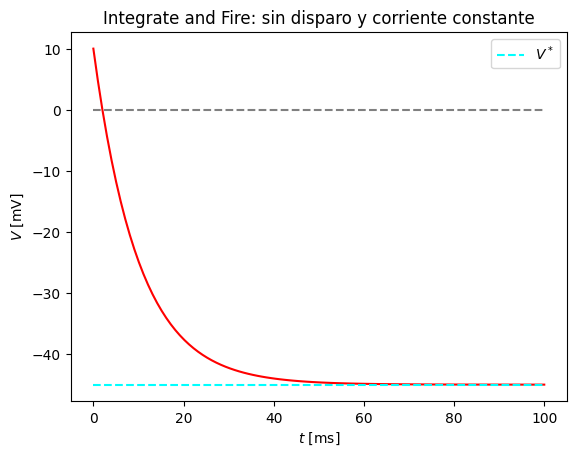

In [414]:
plt.xlabel('$t$ [ms]')
plt.ylabel('$V$ [mV]')
valores_t = np.linspace(0,100,100)
valores_V = np.vectorize(V)(valores_t)
plt.plot(valores_t,valores_V, label = "", linestyle = '-', c = 'red')
plt.plot(valores_t,[Vfix]*len(valores_t), label = "$V^*$", linestyle = '--', c = 'cyan')
plt.plot(valores_t,np.zeros(len(valores_t)),label = "", linestyle = '--', c = 'gray')
plt.title('Integrate and Fire: sin disparo y corriente constante')
plt.legend()

In [ ]:
# 2.4.3)
def f(V):
    return (Vfix-V)/tau
plt.xlabel('$V$ [mV]')
plt.ylabel('$dV/dt=f(V)$ [mV/ms]')
valores_V = np.linspace(-120,20,100)
valores_f = np.vectorize(f)(valores_V)
plt.plot(valores_V,valores_f, label = "", linestyle = '-', c = 'red')
plt.plot(valores_V,np.zeros(len(valores_V)),label = "", linestyle = '--', c = 'gray')
plt.plot([Vfix,Vfix],[-8,8],label="$V^*=E+IR$", linestyle = '--', c = 'cyan')
plt.arrow(Vfix-20.0,0.0,10.0,0.0,head_width=0.5,head_length=2,fc='g',ec='g')
plt.arrow(Vfix+20.0,0.0,-10.0,0.0,head_width=0.5,head_length=2,fc='g',ec='g')
plt.scatter([Vfix],[0],c='black')
plt.title('Integrate and Fire: sin disparo ni corriente')
plt.legend()

### Extra

**2.5)** Resuelva analíticamente la ODE para una corriente de entrada $I:t\to I(t)$ arbitraria.

In [ ]:
# 2.5)


## **Ejercicio 3)** Dinámica con mecanismo de disparo activado

**3.1)** Resuelva numéricamente la ODE del modelo *Integrate and Fire* en el intervalo $t\in [0,200]ms$ para la condición inicial $V(0)=E$ y una corriente de entrada $I(t)=I_0$ para todo $t$ con $I_0=2nA$. Utilice el paso de integración $h=0.05ms$.

In [416]:
# 3.1)
E = -65  # mV
tau = 10  # ms
V0 = 10  # mV
Vu = -50  # mV
R = 10  # Mohms

#Tuve que agregar la definición de la función I, no está en la notebook del profe
def I(t):
  return 2  # nA

p = [E,tau,R,I,Vu]

def f(x,t,p):
  V   = x[0]
  E   = p[0]
  tau = p[1]
  R   = p[2]
  I   = p[3]
  #Vu  = p[4]
  return np.array([(E+R*I(t)-V)/tau])

def c(x,t,p):
  V   = x[0]
  E   = p[0]
  #tau = p[1]
  #R   = p[2]
  #I   = p[3]
  Vu  = p[4]
  if V>Vu:
      V=E
  return np.array([V])

In [431]:
a = 0  # ms
b = 200  # ms
xa = np.array([E])
h = 0.05  # ms
k = int((b-a)/h)
t,w = integrador_ode(rk4,f,xa,a,b,k,p,c=c)
w[0,:]

array([-65.        , -64.84213553, -64.68356393, ..., -52.25225058,
       -52.20142563, -52.15158615])


**3.2)** Grafique la solución computada en el inciso **3.1)**. Incorpore al gráfico la solución exacta del inciso **2.1)**, en donde el mecanismo de disparo está desactivado, para la misma condición inicial del inciso **3.1)**. Grafique, también, líneas punteadas horizontales marcando los valores de $V^*$ y $V_u$, donde $V^*$ es el valor de $V$ tal que $f(V)=0$.



In [419]:
# 3.2)
V0 = E
Vfix = E+I(0)*R
def Vex(t):
    return Vfix+(V0-Vfix)*np.exp(-t/tau)

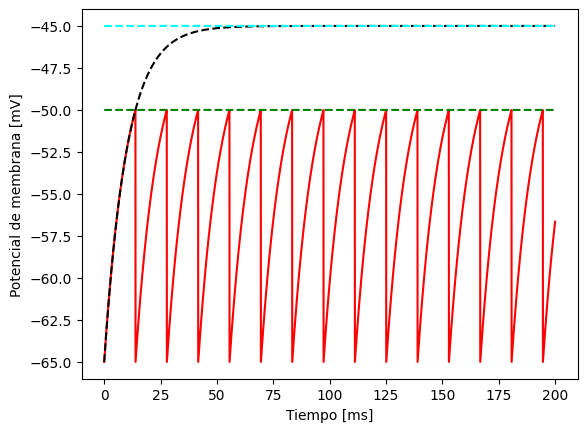

In [420]:
plt.xlabel('Tiempo [ms]')
plt.ylabel('Potencial de membrana [mV]')
valores_t=t
valores_V=w[0,:]
plt.plot(valores_t,valores_V,label = "con disparo", linestyle = '-', c = 'red')
plt.plot(valores_t,np.vectorize(Vex)(valores_t),label = "sin disparo", linestyle = '--', c = 'black')
plt.plot(valores_t,[Vfix]*len(valores_t),label = "$V^*$", linestyle = '--', c = 'cyan')
plt.plot(valores_t,[Vu]*len(valores_t),label = "$V_u$", linestyle = '--', c = 'green')

**3.3)** Para el caso indicado en el inciso **3.1)**, calcule analíticamente el período de disparo.
Observe si el valor computado corresponde con el observado en el inciso **3.2)**.
Grafíque la frecuencia en función de $I_0$.
Que ocurre para valores pequeños de $I_0$?

In [421]:
# 3.3)
# corriente crítica
Ic = (Vu-E)/R
print(f"Corriente crítica: {Ic} nA")

Corriente crítica: 1.5 nA


In [422]:
def periodo(I0):
    print (tau*np.log(I0*R/(I0*R+E-Vu)))
    return tau*np.log(I0*R/(I0*R+E-Vu))

In [423]:
def frecuencia(I0):
    print(1/periodo(I0))
    return 1/periodo(I0)

In [424]:
valores_I0 = np.linspace(Ic+0.01,2*Ic,10)

In [ ]:
plt.xlabel('$I_0$ [nA]')
plt.ylabel('Frecuencia [1/ms]')
plt.scatter(np.linspace(0,Ic,10),np.zeros(10),label="",linestyle = '--', c = 'blue')
plt.scatter(valores_I0,np.vectorize(frecuencia)(valores_I0),label="",linestyle = '-', c = 'blue')
plt.title('Integrate and fire: frecuencia de disparo')
plt.show()

**3.4)** Repita **3.1)** y **3.2)** con $I_e(t)=I_0 \cos(t/30ms)$ e $I_0=2.5nA$ para $0\,ms\leq t\leq 500\,ms$. En este caso, no incluya la solución exacta del inciso **2.1)**, pero sí lineas punteadas horizontales para marcar los valores de $E$ y $V_u$.

In [426]:
# 3.4)
a = 0  # ms
b = 500  # ms
I0 = 2.5  # nA
def I(t):
    return I0*np.cos(t/30)
p = [E,tau,R,I,Vu]

In [427]:
t,w = integrador_ode(rk4,f,xa,a,b,k,p,c=c)

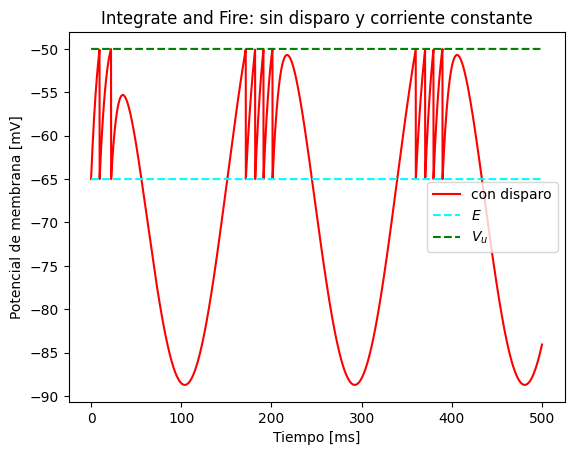

In [428]:
plt.xlabel('Tiempo [ms]')
plt.ylabel('Potencial de membrana [mV]')
valores_t=t
valores_V=w[0,:]
plt.plot(valores_t,valores_V,label = "con disparo", linestyle = '-', c = 'red')
plt.plot(valores_t,[E]*len(valores_t),label = "$E$", linestyle = '--', c = 'cyan')
plt.plot(valores_t,[Vu]*len(valores_t),label = "$V_u$", linestyle = '--', c = 'green')
plt.title('Integrate and Fire: sin disparo y corriente constante')
plt.legend()

**3.5)** Repita **3.1)** y **3.2)** con

\begin{equation}
I(t)= I_0 \, \left(
    \cos{\left( \frac{t}{3ms} \right)} +
    \sin{\left( \frac{t}{5ms} \right)} +
    \cos{\left( \frac{t}{7ms} \right)} +
    \sin{\left( \frac{t}{11ms} \right)} +
    \cos{\left( \frac{t}{13ms} \right)}  \right)^2 \, nA \,
    \;\;\;(4)
\end{equation}

e $I_0=0.35 nA$ para $0\,ms\leq t\leq 200\,ms$. Al igual que en inciso anterior, no incluya la solución exacta del inciso **2.a)**, pero sí lineas punteadas horizontales para marcar los valores de $E$ y $V_u$.

In [429]:
#3.5)
a = 0  # ms
b = 200  # ms
I0 = 0.35  # nA
def I(t):
    return I0*(np.cos(t/3)+np.sin(t/5)+np.cos(t/7)+np.sin(t/11)+np.cos(t/13))**2
p = [E,tau,R,I,Vu]

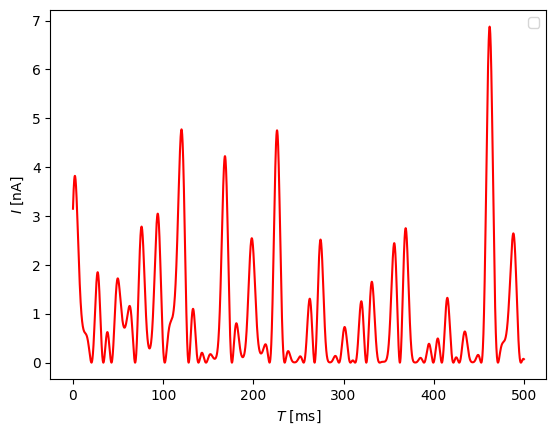

In [430]:
plt.xlabel('$T$ [ms]')
plt.ylabel('$I$ [nA]')
valores_t = t
plt.plot(valores_t,np.vectorize(I)(valores_t), label = "", linestyle = '-', c = 'red')
plt.title('')
plt.legend()